In [1]:
# import sklearn (predictive data analysis tool)
from sklearn.datasets import fetch_openml

# download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

# extract feature matrix X and show 5 random samples
df_X = dataset["frame"]

# 1. Structure Investigation

A first look at the general structure of the dataset. For example, how many columns and rows does the dataset have and how many differents
data types do those features include?

In [4]:
# discovering the dataframe dimensions 
df_X.shape

(363243, 67)

In [5]:
import pandas as pd

In [6]:
# discovering how many different data types 
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [7]:
# investigating how many unique values each non-numerical feature has
df_X.describe(exclude="number")

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,363243,319866,319822,319866,298758
unique,140056,3,365,1439,204,25979
top,201543P296025,1.0,14/02/2015,17:30,E10000017,E01028497
freq,1332,238639,2144,2972,8457,1456


In [8]:
# for each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

<AxesSubplot:title={'center':'Unique values per feature'}>

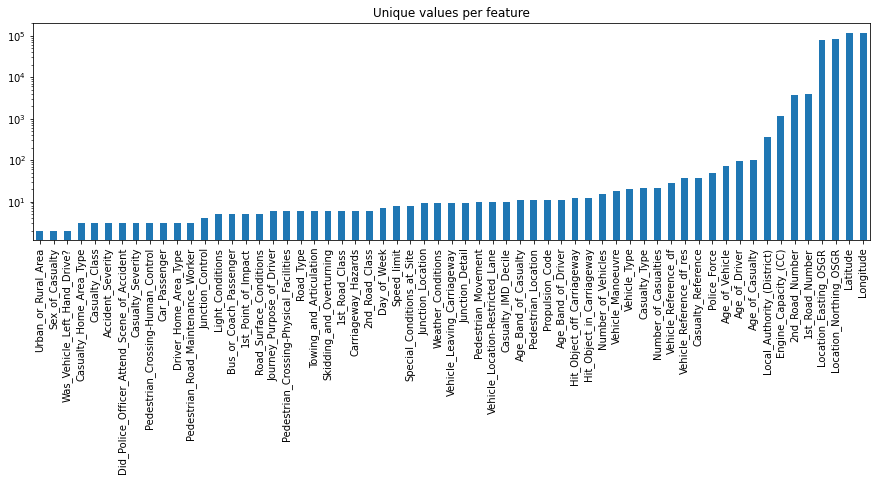

In [9]:
# plot information 
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

## Conclusion of structure investigation:

At the end of this first investigation we should have a better understanding of the general structure of our dataset.

# 2. Quality Investigation

The goal is to have a global view on the dataset with regards to things like _duplicates_, _missing values_, and _unwanted entries_ or _recording errors_.

## 2.1. Duplicates

In [10]:
# checking the number of duplicates (ignoring the index feature)
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print('You seem to have {} duplicates in your database.'.format(n_duplicates))

You seem to have 22 duplicates in your database.


In [11]:
# extracting column names of all features except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

In [12]:
# drop duplicates based on 'columns_to_consider"
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

## 2.2. Missing values

Another quality issue worth to investigate are __missing values__. 

### 2.2.1. Per sample

To look at number of missing values per sample we have multiple options. The most straight forward one is to simply visualize the output of __df_X.sina()__.

Text(0, 0.5, 'Sample Number')

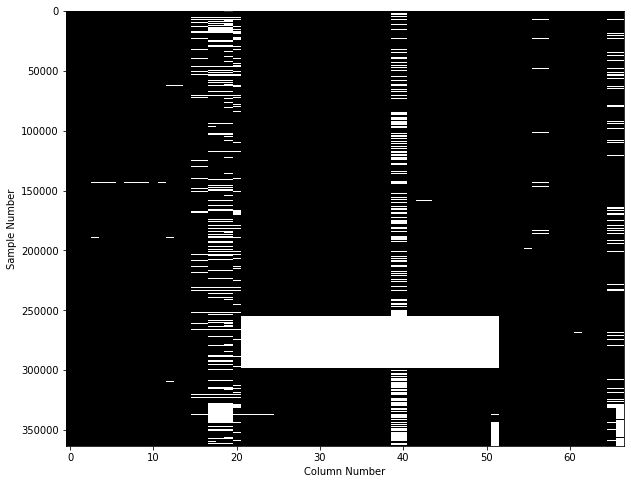

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

While this was already a useful plot, an even better approach is to use the __missingno__ library, to get a plot like this one:

<AxesSubplot:>

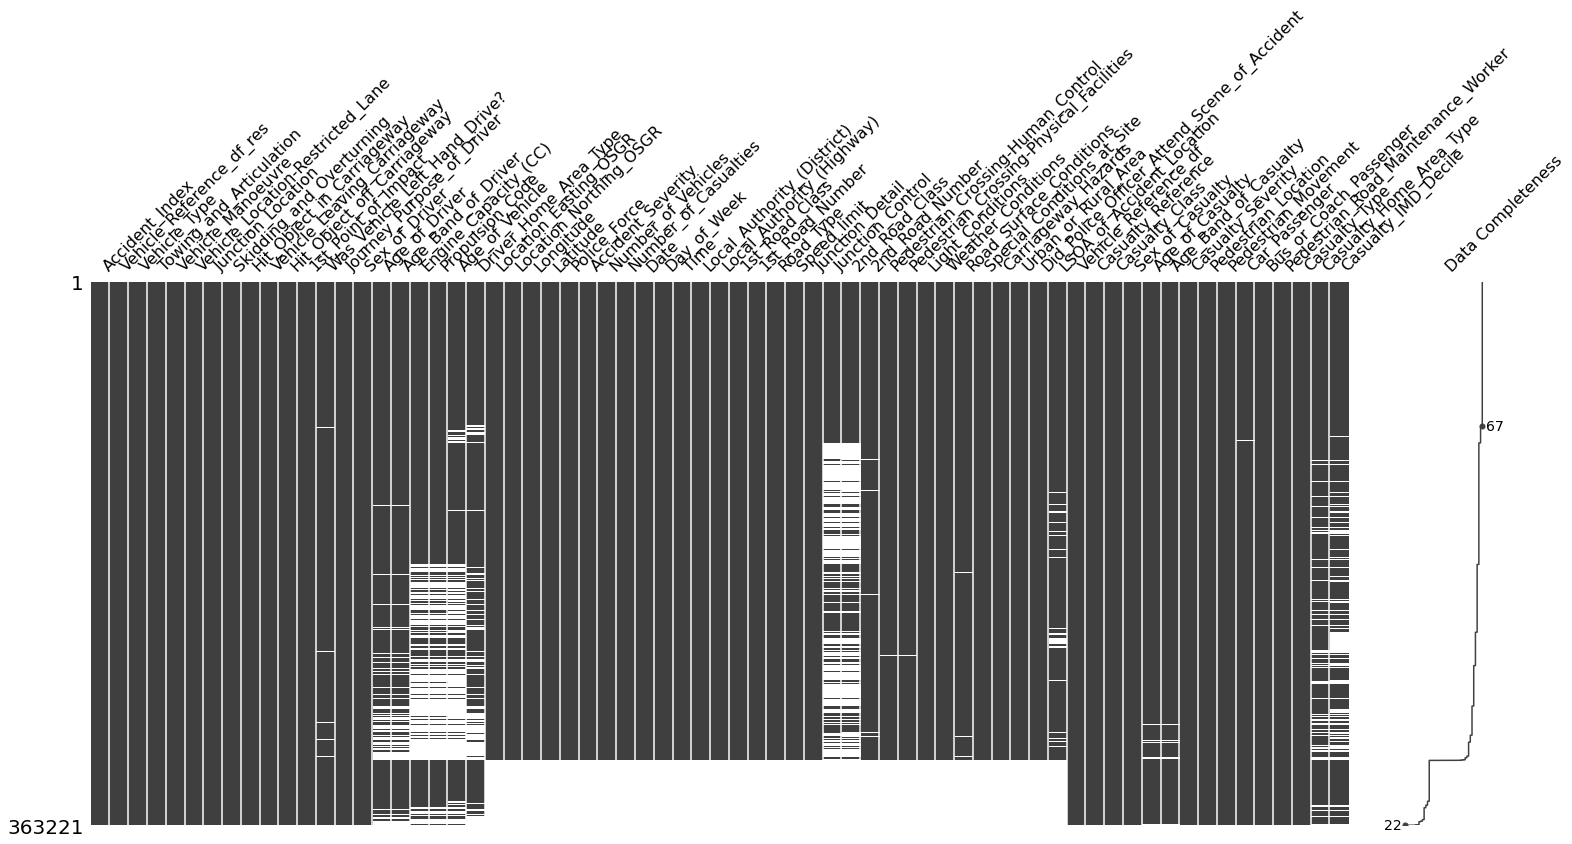

In [14]:
import missingno as msno
msno.matrix(df_X, labels=True, sort="descending")

From both of these plots we can see that the dataset has a huge hole, caused by some samples where more than 50% of the features values are missing.

Therefore, let's go ahead and drop samples that have more than 20% of missing values. The threshold is inspired by the information from the 'Data Completeness' column on the right of this figure.

In [15]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.8, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

### Per feature

Let's now look at the number of missing values per feature. For this we can use some __pandas__ trickery to quickly identify the ratio of missing values __per feature__. 

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

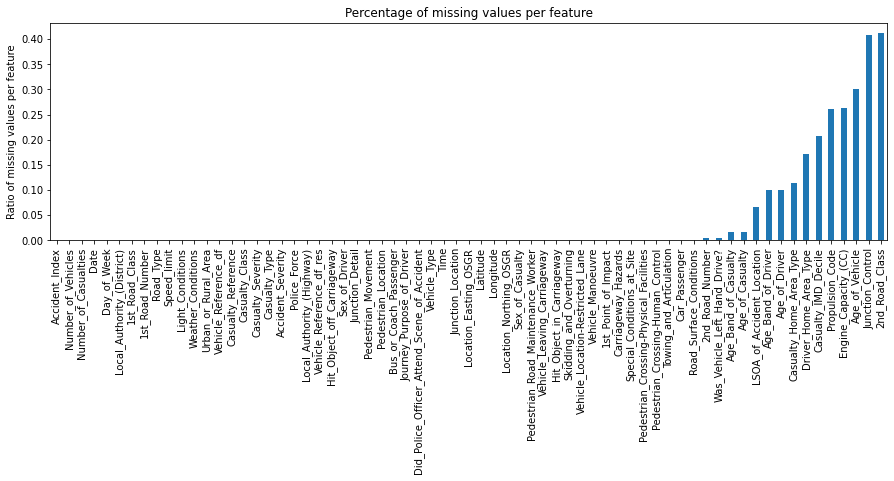

In [16]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

From this figure we can see that most features don't contain any missing values. Let's go ahead and remove any feature with more than 15% of missing values

In [17]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

## 2.3. Unwanted entries and recording errors

Unwanted entries or recording errors are samples that shoundn't be there in te first place.

For exemple a temperature recording of 45o celsius in Switzerland might be an outlier (as in 'very unusual'), while a recording at 90o celsius would be a error.

### 2.3.1. Numerical features

To plot this global view of the dataset, at least for the numerical features, you can use pandas' _.plot()_ function and combine it with the following parameters:

- _lw=0_: _lw_ stands for line width. _0_ means that we don't want to show any lines
- _marker="."_: instead of lines, we tell the plot to use . as marker for each data point
- _subplots=True_: _subplots_ tells _pandas_ to plot each feature in a separate subplot
- _layout=(-1,4)_: this parameter tells _pandas_ how many rows and columns to use for the subplot. The _-1_ means "as many as needed", while the _2_ means to use 2 columns per row
- _figsize=(15, 30), markersize=1_: to make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the _markersize_ accordingly.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplo

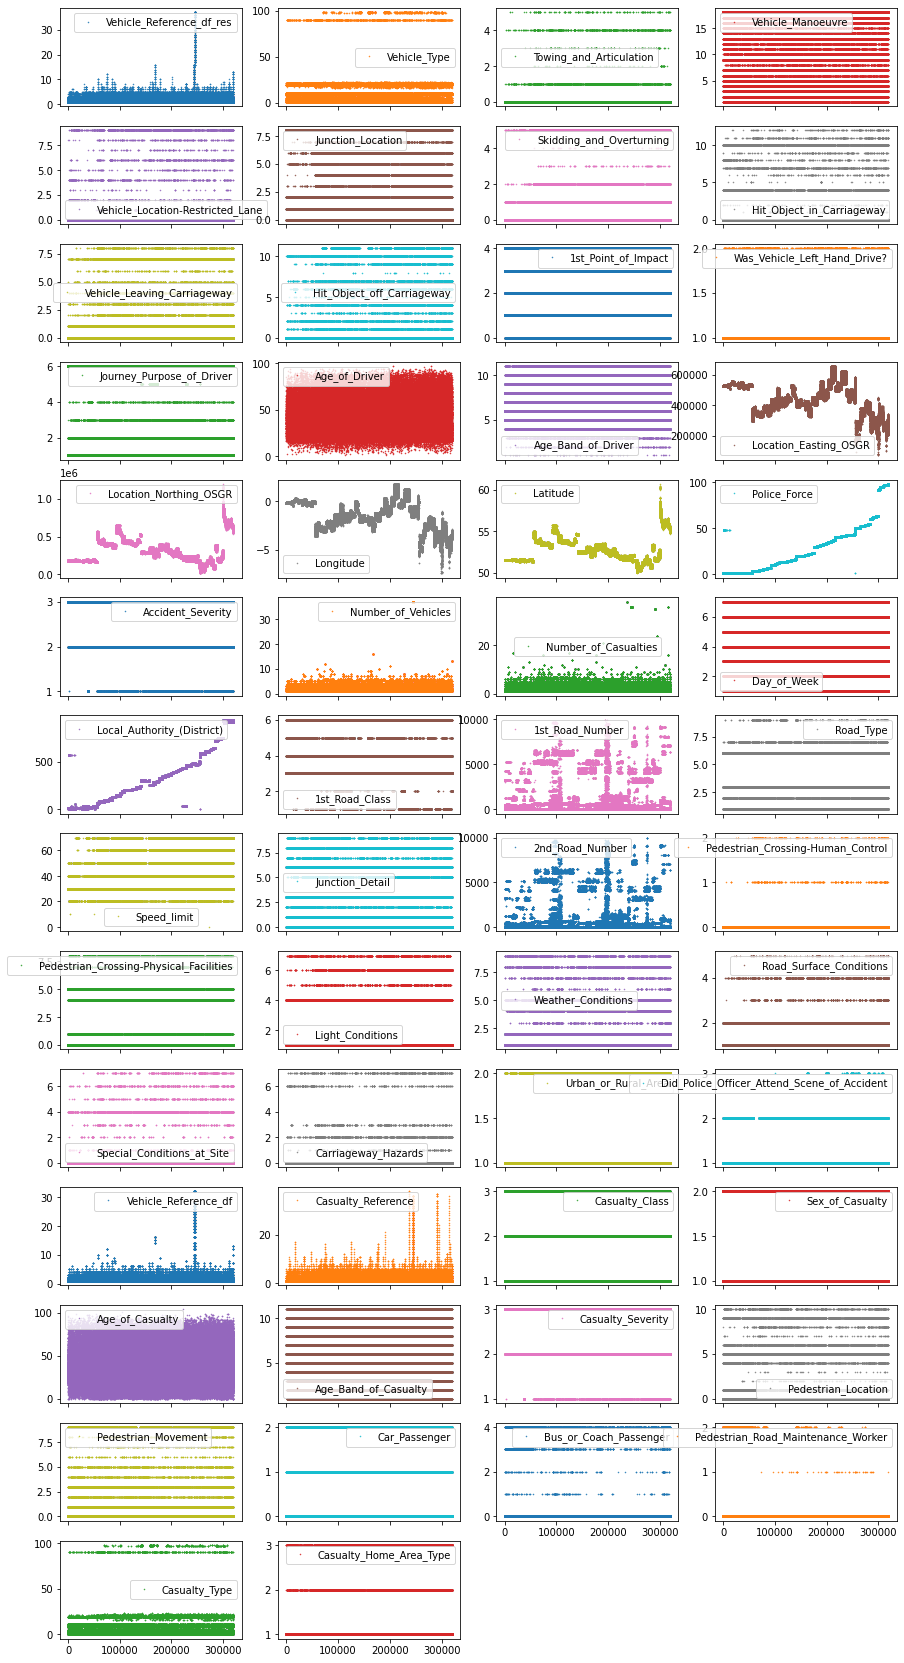

In [19]:
df_X.plot(lw=0,
            marker=".",
            subplots=True,
            layout=(-1, 4),
            figsize=(15, 30),
            markersize=1)

### 2.3.2. Non-numerical features

Identifying __unwanted entries__ or __recording errors__ on nom-numerical features is a bit more tricky. Given that at this point, we only to investigate the general quality of the dataset. So what we can do is take a general look at how many unique values each of these non-numerial features contain, and how often their most frequent category is represented. To do so, we can use: 

In [20]:
df_X.describe(exclude=["number", "datetime"])

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,319790,319790,319790,319746,319790,298693
unique,123645,3,365,1439,204,25977
top,201543P296025,1.0,14/02/2015,17:30,E10000017,E01028497
freq,1332,211218,2144,2969,8457,1456


There are multiple ways for how you could potentially streamline the quality investigation for each individual non-numerical features. None of them is perfect, and all of them will require some follow up investigation. But for the purpose of showcasing one such a solution, what we could do is loop through all non-numerical features and plot for each of them the number of occurrences per unique value.

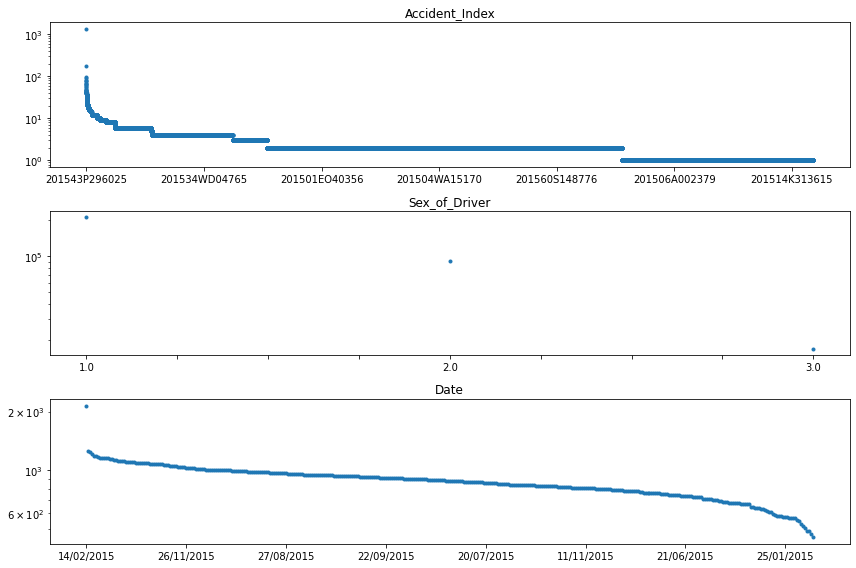

In [23]:
# create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

#identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    # select one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(
        # plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)

plt.tight_layout()

We can see that the most frequent accident (i.e. Accident_Index), had more than 100 people involved. Digging a bit deeper (i.e. looking at the individual features of this accident), we could identify that this accident happened on February 24th, 2015 at 11:55 in Cardiff UK. A quick internet search reveals that this entry corresponds to a luckily non-lethal accident including a minibus full of pensioners.

The decision for what should be done with such rather unique entries is once more left in the the subjective hands of the person analyzing the dataset. Without any good justification for WHY, and only with the intention to show you the HOW - let’s go ahead and remove the 10 most frequent accidents from this dataset.

In [24]:
# collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

## Conclusion of quality investigation

At the end of this second investigation, we should have a better understanding of the general quality of our dataset. We looked at duplicates, missing values and unwanted entries or recording errors. It is important to point out that we didn’t discuss yet how to address the remaining missing values or outliers in the dataset.